# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = url + "appid=" + weather_api_key + "&units="+ units + "&q="
count=0
subset=1

for city in cities:
    # Build query URL based on current element in cities
    city_url = query_url + city
  
    # Get weather data
    response = requests.get(city_url).json()
               
    #pulls specific information form json
    try:
        cit_name = response["name"]
        count= count+1
        if count > 50:
                subset=subset+1
                count= 1
            
        print(f"Processing Record {count} of Set {subset} | {cit_name}")
    except:
        print(f'City not found, skipping')


City not found, skipping
Processing Record 1 of Set 1 | College
Processing Record 2 of Set 1 | Aswān
Processing Record 3 of Set 1 | Hermanus
Processing Record 4 of Set 1 | Vila Velha
Processing Record 5 of Set 1 | Kenora
Processing Record 6 of Set 1 | Northam
Processing Record 7 of Set 1 | Kez
Processing Record 8 of Set 1 | Kwinana
Processing Record 9 of Set 1 | Punta Arenas
Processing Record 10 of Set 1 | Hobart
Processing Record 11 of Set 1 | Butaritari
Processing Record 12 of Set 1 | Khatanga
Processing Record 13 of Set 1 | Atuona
Processing Record 14 of Set 1 | Albany
Processing Record 15 of Set 1 | Gushikawa
Processing Record 16 of Set 1 | Cabo San Lucas
Processing Record 17 of Set 1 | Jaguarão
Processing Record 18 of Set 1 | Faanui
City not found, skipping
Processing Record 19 of Set 1 | Parrita
Processing Record 20 of Set 1 | Hualmay
Processing Record 21 of Set 1 | Saint George
Processing Record 22 of Set 1 | Aklavik
Processing Record 23 of Set 1 | Saint-Augustin
Processing Reco

Processing Record 37 of Set 4 | Finnsnes
Processing Record 38 of Set 4 | Weiser
Processing Record 39 of Set 4 | Beloha
Processing Record 40 of Set 4 | Terre Haute
Processing Record 41 of Set 4 | Meulaboh
Processing Record 42 of Set 4 | Verkhovazh'ye
Processing Record 43 of Set 4 | Dalbandin
Processing Record 44 of Set 4 | Ōdachō-ōda
Processing Record 45 of Set 4 | Mengcheng
Processing Record 46 of Set 4 | Opuwo
Processing Record 47 of Set 4 | Port Shepstone
Processing Record 48 of Set 4 | Palkino
Processing Record 49 of Set 4 | Cockburn Town
Processing Record 50 of Set 4 | Esim
Processing Record 1 of Set 5 | Goderich
Processing Record 2 of Set 5 | Orchard Homes
Processing Record 3 of Set 5 | Hong Kong
Processing Record 4 of Set 5 | Dikson
Processing Record 5 of Set 5 | Gorin
Processing Record 6 of Set 5 | Kiama
Processing Record 7 of Set 5 | Tambura
Processing Record 8 of Set 5 | Durusu
City not found, skipping
Processing Record 9 of Set 5 | Port Blair
Processing Record 10 of Set 5 | S

Processing Record 26 of Set 8 | Kortkeros
Processing Record 27 of Set 8 | Guerrero Negro
Processing Record 28 of Set 8 | Lagoa
Processing Record 29 of Set 8 | Cheremshanka
Processing Record 30 of Set 8 | Narsaq
Processing Record 31 of Set 8 | Yarmouth
City not found, skipping
Processing Record 32 of Set 8 | Kamenka
Processing Record 33 of Set 8 | Panguna
Processing Record 34 of Set 8 | Altay
Processing Record 35 of Set 8 | Ponta Delgada
Processing Record 36 of Set 8 | Berdigestyakh
City not found, skipping
Processing Record 37 of Set 8 | Nikolayevka
Processing Record 38 of Set 8 | Tual
Processing Record 39 of Set 8 | Novouzensk
Processing Record 40 of Set 8 | Cortes
Processing Record 41 of Set 8 | Noumea
Processing Record 42 of Set 8 | Eskil
Processing Record 43 of Set 8 | Joensuu
Processing Record 44 of Set 8 | Rūdbār
Processing Record 45 of Set 8 | Shirokiy
Processing Record 46 of Set 8 | Mahabalipuram
City not found, skipping
Processing Record 47 of Set 8 | Makakilo City
Processing 

Processing Record 14 of Set 12 | Chibombo
Processing Record 15 of Set 12 | Darnah
Processing Record 16 of Set 12 | Kudahuvadhoo
Processing Record 17 of Set 12 | Elk City
Processing Record 18 of Set 12 | Koungheul
City not found, skipping


In [37]:
#url= "http://api.openweathermap.org/data/2.5/weather?"
#query_url= url + "appid=" + weather_api_key + "&q=" + city
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lng.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError as e:
            print(f'No data found {city}')

No data found aflu
No data found labutta
No data found barentsburg
No data found umzimvubu
No data found vaitupu
No data found taolanaro
No data found louisbourg
No data found samusu
No data found illoqqortoormiut
No data found abu jubayhah
No data found privokzalnyy
No data found utiroa
No data found barghis
No data found marv dasht
No data found fevralsk
No data found kuche
No data found toliary
No data found umm ruwabah
No data found tarudant
No data found belushya guba
No data found kamenskoye
No data found attawapiskat
No data found crab hill
No data found sentyabrskiy
No data found fulacunda
No data found dujuma
No data found amderma
No data found play cu
No data found skagastrond
No data found ahumada
No data found halalo
No data found tsihombe
No data found gazni
No data found mys shmidta
No data found pakwach
No data found saleaula
No data found natulongan
No data found grand river south east
No data found satitoa
No data found pullampadi
No data found nabul
No data found nizh

In [38]:
cities_dict={ "City":city_name,
              "Lat" :lat,
              "Lng":lng,
              "Max Temp":max_temp,
               "Humidity":humidity,
              "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Country":country,
                "Date":date }       
  
    
cities_df=pd.DataFrame(cities_dict)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,College,64.8569,-147.8028,10.00,78,75,2.73,US,1613106358
1,Aswān,24.0934,32.9070,65.03,26,95,9.13,EG,1613106358
2,Hermanus,-34.4187,19.2345,72.00,92,80,1.01,ZA,1613106358
3,Vila Velha,-20.3297,-40.2925,75.20,88,0,2.30,BR,1613106175
4,Kenora,49.8167,-94.4337,-18.00,63,90,4.61,CA,1613106358


In [39]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,21.041222,16.999987,48.673944,73.836268,54.852113,8.448011,1.613106e+09
std,33.460205,88.809188,32.889585,18.940442,39.247183,6.385137,7.521774e+01
min,-54.800000,-175.200000,-40.000000,14.000000,0.000000,0.180000,1.613106e+09
25%,-7.238050,-62.590850,24.025000,64.000000,12.750000,3.980000,1.613106e+09
50%,26.549100,23.489600,60.145000,78.000000,69.000000,6.910000,1.613106e+09
75%,48.612400,94.829900,75.162500,88.000000,90.000000,11.215000,1.613106e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,40.260000,1.613106e+09


In [19]:
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [40]:
#No cities >100
#cities_df.loc[cities_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

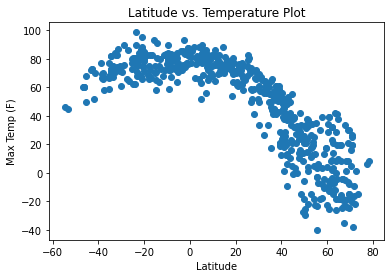

In [42]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Temperature Plot')

plt.show()

## Latitude vs. Humidity Plot

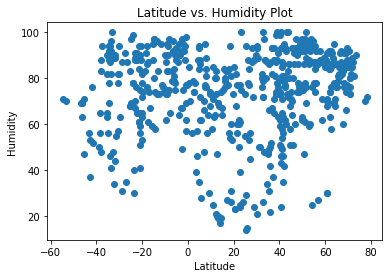

In [43]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

plt.show()

## Latitude vs. Cloudiness Plot

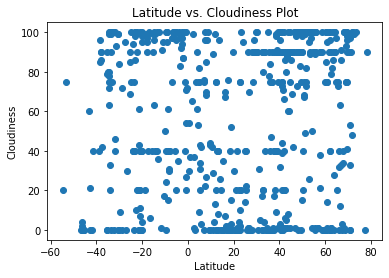

In [44]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')

plt.show()

## Latitude vs. Wind Speed Plot

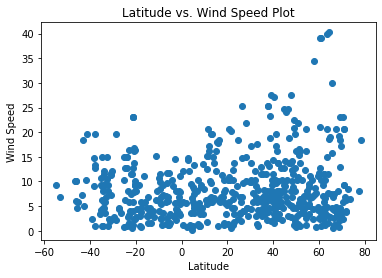

In [45]:
plt.scatter(cities_df.iloc[:,1],cities_df.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression